# GNN-N:100-Layer GCN Results Visualization
-----

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Accuracy, R-RR, RO-RR

In [18]:
result_path = os.path.join(os.getcwd(), "../src/outputs/gnn_n/gnn_n_100layerGCN.csv")
result_df = pd.read_csv(result_path,index_col=0,header=0)
result_df

,acc mean original features,acc std original features,acc mean random features,acc std random features,r_rr mean,r_rr std,ro_rr mean,ro_rr std
cora,0.3090,5.851389e-17,0.3090,1.115816e-16,1.0,0.0,1.0,0.0
pubmed,0.2418,0.000000e+00,0.2418,0.000000e+00,1.0,0.0,1.0,0.0
citeseer,0.1729,0.000000e+00,0.1729,0.000000e+00,1.0,0.0,1.0,0.0
amazon_photo,0.3295,0.000000e+00,0.3295,0.000000e+00,1.0,0.0,1.0,0.0
amazon_computers,0.3416,0.000000e+00,0.3416,0.000000e+00,1.0,0.0,1.0,0.0
coauthors_physics,0.1228,0.000000e+00,0.1228,0.000000e+00,1.0,0.0,1.0,0.0
coauthors_cs,0.5278,0.000000e+00,0.5051,0.000000e+00,1.0,0.0,1.0,0.0


In [32]:
# Attach a text label above each bar in *rects*, displaying its height
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.1f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

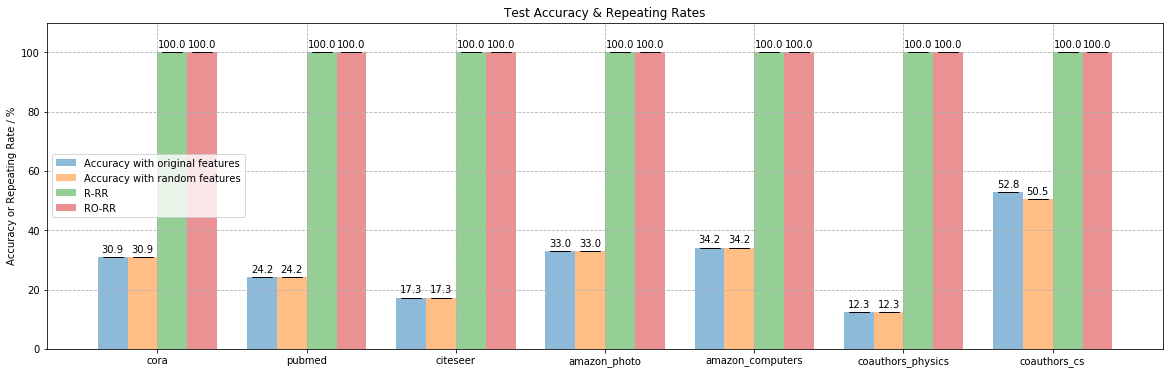

In [33]:
datasets = ["cora", "pubmed", "citeseer", "amazon_photo", "amazon_computers", "coauthors_physics", "coauthors_cs"]

x = np.arange(len(datasets))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(20,6))
rects1 = ax.bar(x - 3*width/2, result_df['acc mean original features']*100, width, label='Accuracy with original features', yerr=result_df['acc std original features'],align='center', alpha=0.5, ecolor='black', capsize=10)
rects2 = ax.bar(x - width/2, result_df['acc mean random features']*100, width, label='Accuracy with random features', yerr=result_df['acc std random features'],align='center', alpha=0.5, ecolor='black', capsize=10)
rects3 = ax.bar(x + width/2, result_df['r_rr mean']*100, width, label='R-RR', yerr=result_df['r_rr std'],align='center', alpha=0.5, ecolor='black', capsize=10)
rects4 = ax.bar(x + 3*width/2, result_df['ro_rr mean']*100, width, label='RO-RR', yerr=result_df['ro_rr std'],align='center', alpha=0.5, ecolor='black', capsize=10)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy or Repeating Rate / %')
ax.set_title('Test Accuracy & Repeating Rates')
ax.set_xticks(x)
ax.set_xticklabels(datasets)
ax.set_ylim(0,110)
ax.grid(ls='--')
ax.legend()

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

## TT-RR

In [29]:
dataset_name = 'cora'

In [30]:
tt_rr_file = os.path.join(os.getcwd(), '../src/outputs/gnn_n/tt_rr_'+dataset_name+'.npy')
with open(tt_rr_file, 'rb') as f:
    tt_rr_array = np.load(f,allow_pickle=True)
f.close()

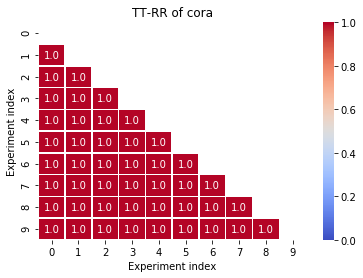

In [31]:
mask = np.zeros_like(tt_rr_array)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(tt_rr_array, vmin=0, vmax=1, annot=True, cmap='coolwarm',fmt=".1f",linewidths=.5, mask=mask)
plt.xlabel('Experiment index')
plt.ylabel('Experiment index')
ax.set_title('TT-RR of '+ dataset_name)
plt.show()